In [107]:
%matplotlib inline

%pip install --upgrade pandas


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
# Read the csv file in this folder to a dataframe. The file is calle "kepler.csv"
df = pd.read_csv("kepler.csv")


df

<class 'pandas.core.frame.DataFrame'>


,# name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,OGLE-2016-BLG-1469L b,Confirmed,13.600,3.000,3.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11 Com b,Confirmed,19.400,1.500,1.500,19.400,1.500,1.500,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
2,11 Oph b,Confirmed,21.000,3.000,3.000,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,NaN
3,11 UMi b,Confirmed,10.500,2.470,2.470,10.500,2.470,2.470,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
4,14 And b,Confirmed,5.330,0.570,0.570,5.330,0.570,0.570,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,tau Gem b,Confirmed,20.600,NaN,NaN,20.600,NaN,NaN,NaN,NaN,...,K2III,1.220,0.760,0.760,4388.0,25.0,25.0,NaN,NaN,NaN
3728,ups And b,Confirmed,0.620,0.090,inf,0.620,0.090,0.090,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
3729,ups And c,Confirmed,9.100,2.900,5.000,1.800,0.260,0.260,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN
3730,ups And d,Confirmed,23.580,2.295,2.931,10.190,NaN,NaN,NaN,NaN,...,F8 V,3.800,1.000,1.000,6212.0,80.0,80.0,NaN,NaN,NaN


<AxesSubplot: xlabel='star_sp_type'>

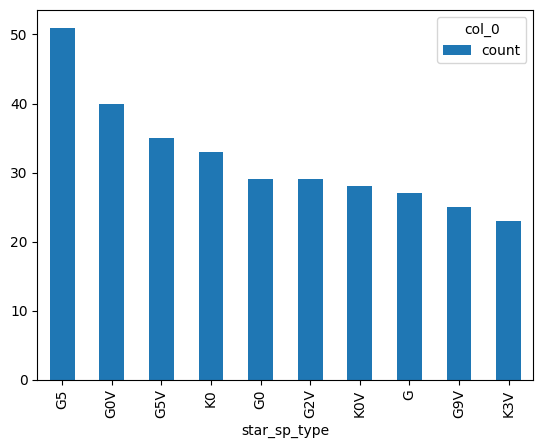

In [129]:
pd.crosstab(index=df["star_sp_type"], columns="count")

# Órdenalo de mayor a menor la columna count
pd.crosstab(index=df["star_sp_type"], columns="count").sort_values(by="count", ascending=False)


# Crea un gráfico de barras con el resultado anterior sólo con los 10 más frecuentes
pd.crosstab(index=df["star_sp_type"], columns="count").sort_values(by="count", ascending=False).head(10).plot(kind="bar")

# Me puedes dibujar otro tipo de gráfico para este resultado?
# pd.crosstab(index=df["star_sp_type"], columns="count").sort_values(by="count", ascending=False).head(10).plot(kind="pie", subplots=True)


In [154]:
pd.crosstab(index=df["star_sp_type"],columns=df["planet_status"],margins=True)

# Agrupa los datos del dataframe por lustros con la columna "discovered" y cuenta cuántos planetas hay por lustro. Deja en el dataframe solo estas columnas: para las siguientes columnas "mass", "star_mass", "star_radius", "discovered", "star_age", "star_distance"
df.groupby(pd.cut(df["discovered"], np.arange(min(df["discovered"]), max(df["discovered"]), 5))).count()[["mass"]]



,mass
discovered,
"(1988.0, 1993.0]",4
"(1993.0, 1998.0]",18
"(1998.0, 2003.0]",104
"(2003.0, 2008.0]",213
"(2008.0, 2013.0]",689


/var/folders/sh/9bbsgk012cqb1v63_49fjyy40000gn/T/ipykernel_31858/3294768493.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.groupby("star_sp_type")["star_age"].mean().dropna().sort_values(ascending=False), shade=True)


<AxesSubplot: xlabel='star_age', ylabel='Density'>

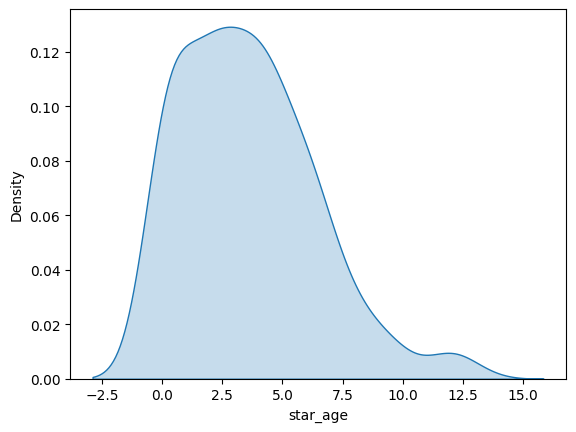

In [116]:
# Calcula una tabla con la edad media de las estrellas por tipo de estrella. Quita los NaN, y ordena de mayor a menor
df.groupby("star_sp_type")["star_age"].mean().dropna().sort_values(ascending=False)

# Dibuja este resultado en un gráfico de densidad coloreado. Elimina los valores inferiores a 0
sns.kdeplot(df.groupby("star_sp_type")["star_age"].mean().dropna().sort_values(ascending=False), shade=True)


In [117]:
# Utiliza describe() para las siguientes columnas "mass", "star_mass", "star_radius", "discovered", "star_age", "star_distance"
df[["mass", "star_mass", "star_radius", "discovered", "star_age", "star_distance"]].describe()



,mass,star_mass,star_radius,discovered,star_age,star_distance
count,1586.000000,3354.000000,3302.000000,3731.000000,1029.000000,2584.000000
mean,4.246192,0.994323,1.526180,2013.525060,4.393558,605.089602
std,9.706793,0.755668,3.176343,3.691756,3.111324,844.370337
min,0.000002,0.016200,0.089000,1988.000000,0.000500,1.295000
25%,0.117500,0.820000,0.810000,2013.000000,2.000000,74.800000
50%,0.945500,0.970000,0.990000,2014.000000,3.970000,435.500000
75%,3.097500,1.110000,1.250000,2016.000000,6.450000,860.250000
max,93.600000,40.000000,51.100000,2018.000000,15.000000,8500.000000


3.0

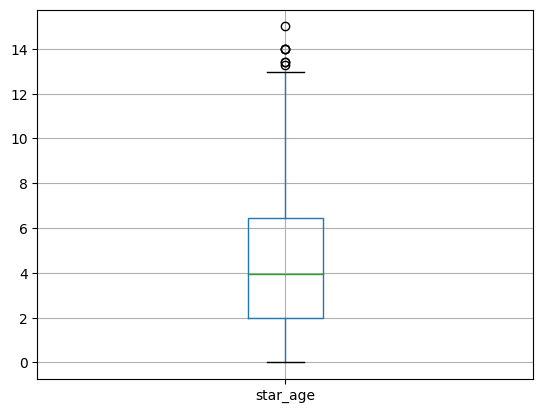

In [102]:
df.boxplot(column="star_age")

# Calcula la moda de la columna "star_age"
statistics.mode(df["star_age"])

# Dibuja el gráfico anterior como un violinplot
# sns.violinplot(df["star_age"])

<AxesSubplot: xlabel='discovered', ylabel='star_age'>

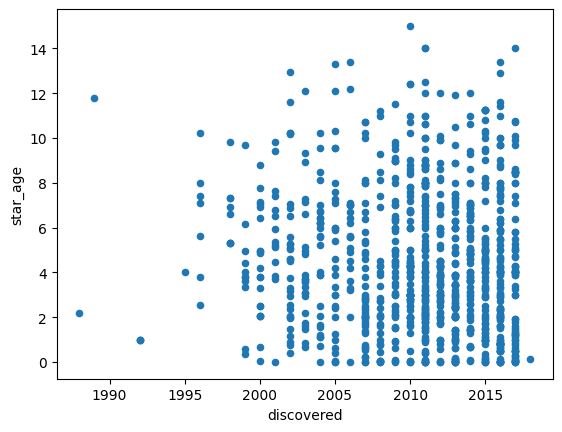

In [132]:
# Dibuja un gráfico de dispersión, que en el eje y ponga "star_age"  y en el x "discovered". Agrupando por edad media de las estrellas
df.plot.scatter(x="discovered", y="star_age")






<AxesSubplot: ylabel='Frequency'>

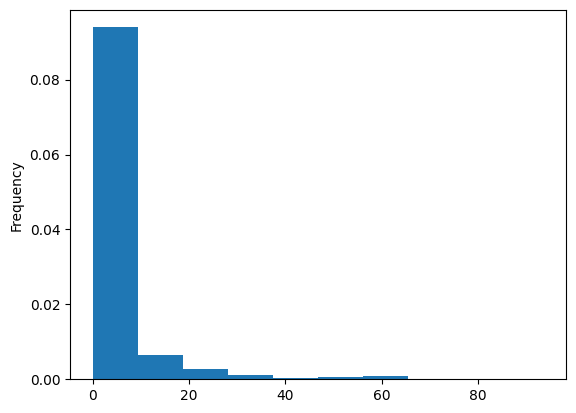

In [153]:
# Dibuja un histograma de la columna "mass". Nombra al eje  x "masa" y al eje y "frecuencia"
df["mass"].plot.hist(density=True)
